# Mathematical Modeling Final Project : 
## Analysis of Epidemic Spread Using Mathematical and Computational Models

### Import packages

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Load in dataset

In [2]:
#Load in the data set
data_spread = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Mathmatical Modeling/Final Project/Data Files/Disease_Spread.csv')
#Set the index to day
data_spread.set_index('Day',inplace=True)
data_spread

,Susceptible,Infected,Recovered
Day,,,
0,990,10,0
1,987,12,1
2,983,14,2
3,979,17,4
4,974,20,5
...,...,...,...
96,53,2,945
97,53,2,946
98,53,1,946


## 0. Understanding the Data

### Data Analysis

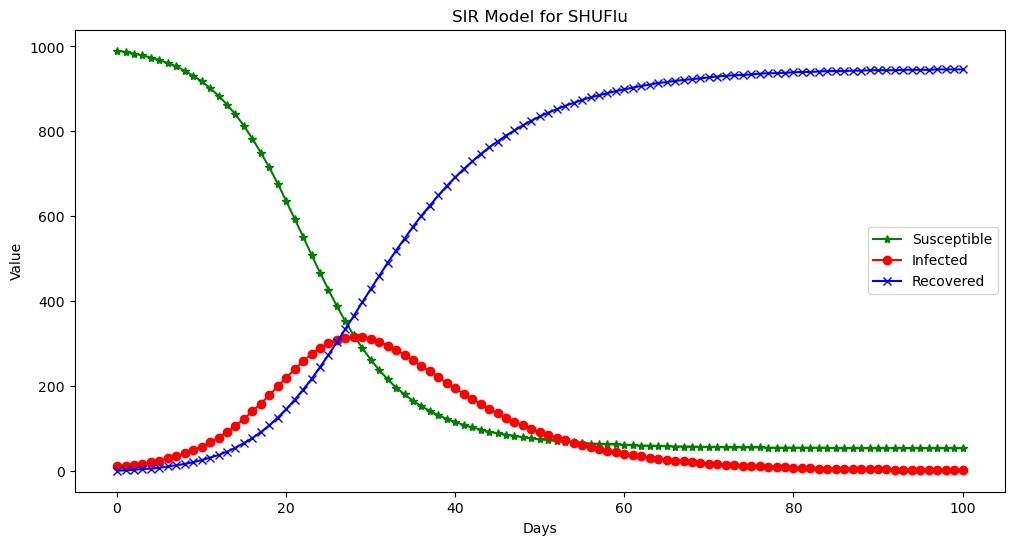

In [3]:
#Plot the original 100 days of data
plt.figure(figsize=(12,6))
plt.plot(data_spread['Susceptible'], color='green', label='Susceptible', marker='*')
plt.plot(data_spread['Infected'], color='red', label='Infected', marker='o')
plt.plot(data_spread['Recovered'], color='blue', label='Recovered', marker='x')
plt.title('SIR Model for SHUFlu')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend()
plt.show()

Observe that there is a point in time where there is a peak in the number of infections which is the same time that the number of susceptible people becomes less than the number of recovered people.

#### Maximum Number of Infections

In [4]:
#Print the maximum number of infected people at one point
maximum_infected_time = data_spread['Infected'].idxmax()+1
max_infected_value = data_spread['Infected'].max()
print(f'Maximum Number of Infections: {max_infected_value}, at time {maximum_infected_time} days')

Maximum Number of Infections: 316, at time 29 days


This explains that the peak number of infections on the wave is 316. This is almost 1/3 of the population with the disease at this peak of the wave. This takes place a month into the the beginning of the infection.

### Rate of Change Analysis

In [5]:
#Create a dataframe that finds the rate of change
data_spread['Change in Susceptibles'] = data_spread['Susceptible'].diff()
data_spread['New Infections'] = data_spread['Infected'].diff()
data_spread['New Recoveries'] = data_spread['Recovered'].diff()

change_data_spread = data_spread[['Change in Susceptibles','New Infections','New Recoveries']]
change_data_spread

,Change in Susceptibles,New Infections,New Recoveries
Day,,,
0,NaN,NaN,NaN
1,-3.0,2.0,1.0
2,-4.0,2.0,1.0
3,-4.0,3.0,2.0
4,-5.0,3.0,1.0
...,...,...,...
96,0.0,0.0,0.0
97,0.0,0.0,1.0
98,0.0,-1.0,0.0


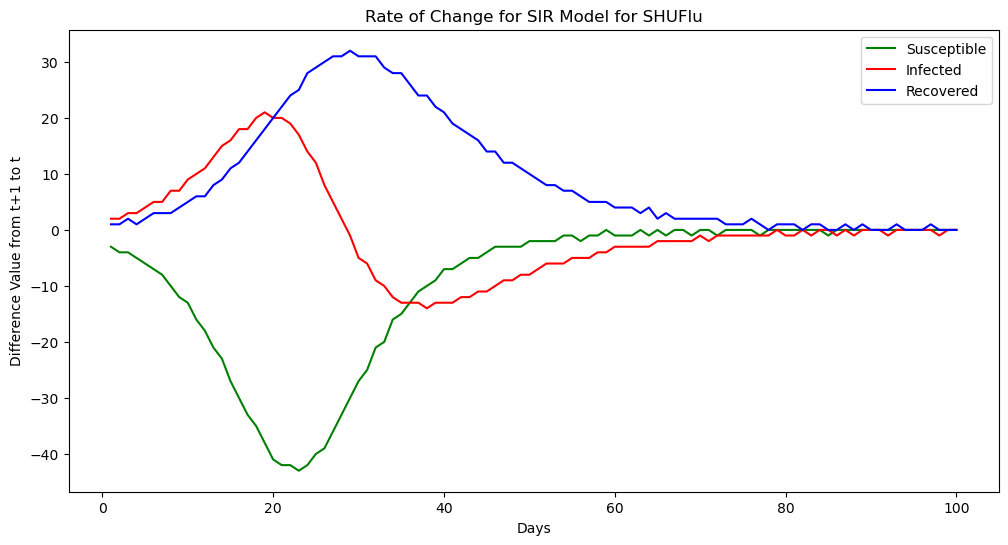

In [6]:
#Plot the changes 
plt.figure(figsize=(12,6))
plt.plot(data_spread['Change in Susceptibles'], color='green', label='Susceptible')
plt.plot(data_spread['New Infections'], color='red', label='Infected')
plt.plot(data_spread['New Recoveries'], color='blue', label='Recovered')
plt.title('Rate of Change for SIR Model for SHUFlu')
plt.xlabel('Days')
plt.ylabel('Difference Value from t+1 to t')
plt.legend()
plt.show()

In [7]:
#Look at where the rate of change for infections is greatest
maximum_rate_infection_time = change_data_spread['New Infections'].idxmax()+1
maximum_rate_infection = change_data_spread['New Infections'].max()
print(f'The maximum rate of infections was {maximum_rate_infection} at day {maximum_rate_infection_time}')

The maximum rate of infections was 21.0 at day 20


At day 20 the maximum rate of infections was found. This is essentially the point in time where the gradient of the infection curve is at its steepest level. This suggests that the highest rate of infection takes place 9 days before the peak. This exemplifies how there is a delayed effect with the total number of infections with how fast the infection rate is growing. Which is why understanding how infection rates change from day to day is more important that the number of infections on a given day. With about 2% of the population being infected a day at this time. 

### Rate of infection and infection number wave comparison
By looking at the time period where these two eaves have their different peaks, it can be useful to understand how the delay is observed visually.

In [8]:
#Set a start and end index for interesting points to observe
start_index = 0
end_index = 60

#Create index values
maximum_data = data_spread[start_index:end_index]
maxmimum_change_data = change_data_spread[start_index:end_index]

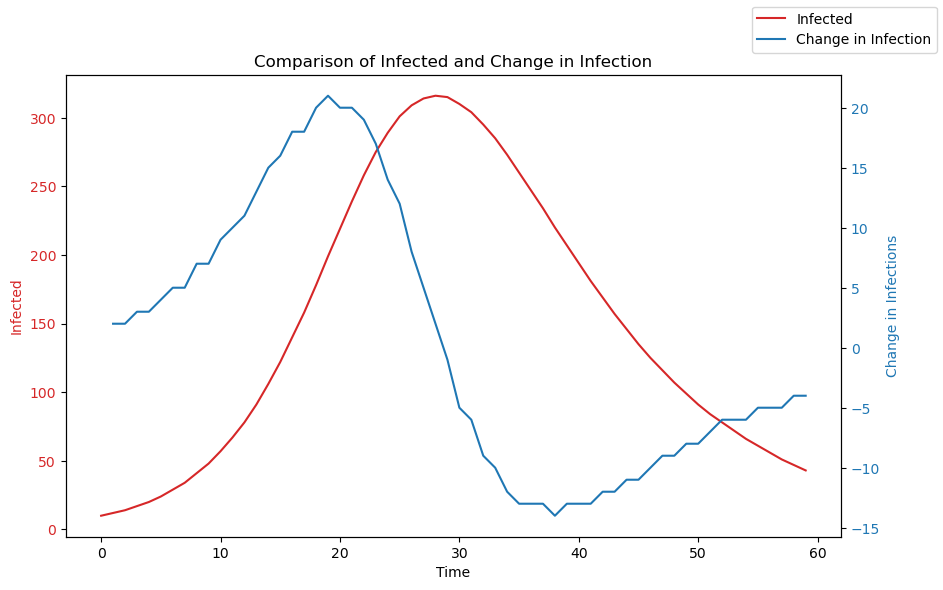

In [9]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the 'Infected' data from 'maximum_data' on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Infected', color=color)
ax1.plot(maximum_data['Infected'], color=color, label='Infected')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'New Infections' data
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Change in Infections', color=color)
ax2.plot(maxmimum_change_data['New Infections'], color=color, label='Change in Infection')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.legend(loc='upper right')

# Display the plot
plt.title('Comparison of Infected and Change in Infection')
plt.show()

As the population remains the same, there is no need to compare the susceptible with the number of infected. However if populations were changing it would look different.

You can observe how the infection rate and infection have different time intervals where there is a maximum value. There is about a week delay from the growth rate being highest and the infection numbers being the highest. If there was a growing population of people (susceptible would increase) then it could continue to infect. This disease had 30% of the 1000 people infected at one point. Where as the maximum new infections per day were at 2% per day. If reinfection could take place then multiple waves would have taken place.

In [10]:
#How many people did not get infected?
not_infected = data_spread['Susceptible'].iloc[-1]
print(f'There was only {not_infected} people not infected')

There was only 53 people not infected


### Data Normalisation, comparison of waves

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = data_spread.columns

# Apply Min-Max scaling to selected columns
data_spread_normalized = data_spread.copy()  # Create a copy of the original DataFrame
data_spread_normalized[columns_to_normalize] = scaler.fit_transform(data_spread_normalized[columns_to_normalize])

# Print or use the normalized DataFrame
data_spread_normalized

,Susceptible,Infected,Recovered,Change in Susceptibles,New Infections,New Recoveries
Day,,,,,,
0,1.000000,0.028571,0.000000,NaN,NaN,NaN
1,0.996798,0.034921,0.001057,0.930233,0.457143,0.03125
2,0.992529,0.041270,0.002114,0.906977,0.457143,0.03125
3,0.988260,0.050794,0.004228,0.906977,0.485714,0.06250
4,0.982924,0.060317,0.005285,0.883721,0.485714,0.03125
...,...,...,...,...,...,...
96,0.000000,0.003175,0.998943,1.000000,0.400000,0.00000
97,0.000000,0.003175,1.000000,1.000000,0.400000,0.03125
98,0.000000,0.000000,1.000000,1.000000,0.371429,0.00000


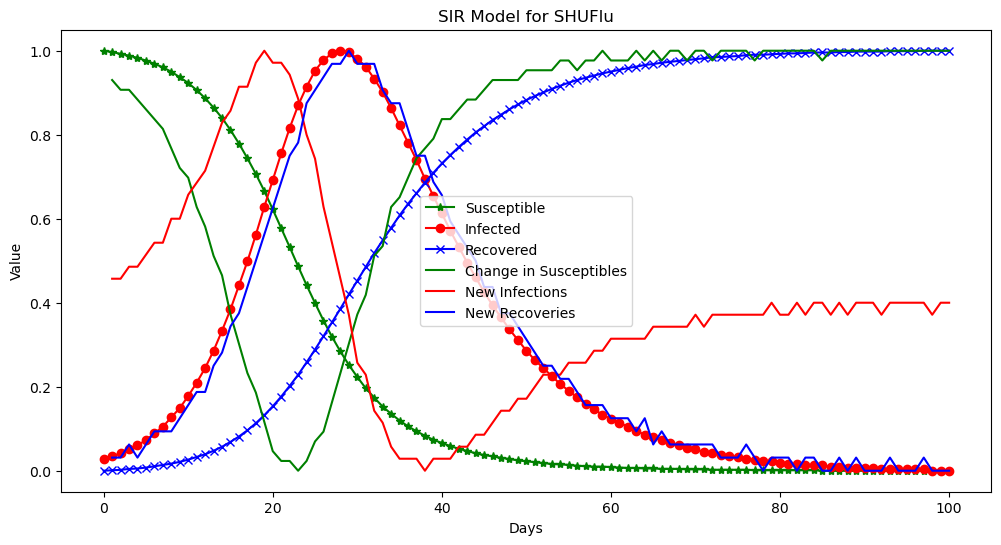

In [12]:
# Plot the original SIR curves
plt.figure(figsize=(12,6))
plt.plot(data_spread_normalized['Susceptible'], color='green', label='Susceptible', marker='*')
plt.plot(data_spread_normalized['Infected'], color='red', label='Infected', marker='o')
plt.plot(data_spread_normalized['Recovered'], color='blue', label='Recovered', marker='x')
plt.plot(data_spread_normalized['Change in Susceptibles'], color='green', label='Change in Susceptibles', linestyle='-')
plt.plot(data_spread_normalized['New Infections'], color='red', label='New Infections', linestyle='-')
plt.plot(data_spread_normalized['New Recoveries'], color='blue', label='New Recoveries', linestyle='-')
plt.title('SIR Model for SHUFlu')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend()

This graph shows which relationships of rates and values are related. The people where a lot of lines cross is during the maximum number of infections (day 29). 

1. New recoveries and infected follow almost exact trends which means that the rate of new recoveries will follow a simialr pattern to new infections. This means there is not too long of a delay in recoveries. If there was a longer delay you would expect recovery rates to have a bigger lag.

2. Susceptible and recovered have inverse relationships to one another.

3. New infections and Susceptibles have opposite relationships to one another again.

## 1. Model the Spread of Disease
Using the differential equations as discussed in the report, transpose the equations to find the unknown parameters using the existing data.
1. Gamma rate
2. Beta rate

### Solving for Gamma Rate using historical data
The gamma rate is the rate at which people recover from the infection.

In [13]:
# Create a new column 'Gamma' in data_spread
#Using the transposed different rquation for change in recovery rate.
data_spread['Gamma Rate'] = pd.Series(dtype=float)

for index, day in enumerate(data_spread.index):
    # Check if day+1 exists in the index
    if index + 1 < len(data_spread):
        # Calculate gamma based on the number of new recoveries on the next day
        gamma_value = ((data_spread['Recovered'].iloc[index+1])- (data_spread['Recovered'].iloc[index])) / (data_spread['Infected'][index])
        # Assign gamma value to the 'Gamma' column
        data_spread.at[index, 'Gamma Rate'] = gamma_value
    else:
        print("End of data reached, cannot pass day", day)
        break  # Stop iterating if day+1 is out of range
data_spread['Gamma Rate'] = data_spread['Gamma Rate'].replace({0: 0, np.inf: 0})

End of data reached, cannot pass day 100


### Solving for Beta Rate using historical data

In [14]:
#Create a new column for beta rate
#Using the transposed differential equation for Change in susceptibles
data_spread['Beta Rate'] = pd.Series(dtype=float)

for index, day in enumerate(data_spread.index):
    if index + 1 < len(data_spread):
        beta_value = -(((data_spread['Susceptible'].iloc[index+1] - data_spread['Susceptible'].iloc[index]))*1000 / ((data_spread['Susceptible'].iloc[index] * data_spread['Infected'].iloc[index])))
        data_spread.at[index,'Beta Rate'] = beta_value
    else:
        print("End of data reached, cannot pass day", day)
        break  # Stop iterating if day+1 is out of range
    data_spread['Beta Rate'] = data_spread['Beta Rate'].replace({0: 0, np.inf: 0})

End of data reached, cannot pass day 100


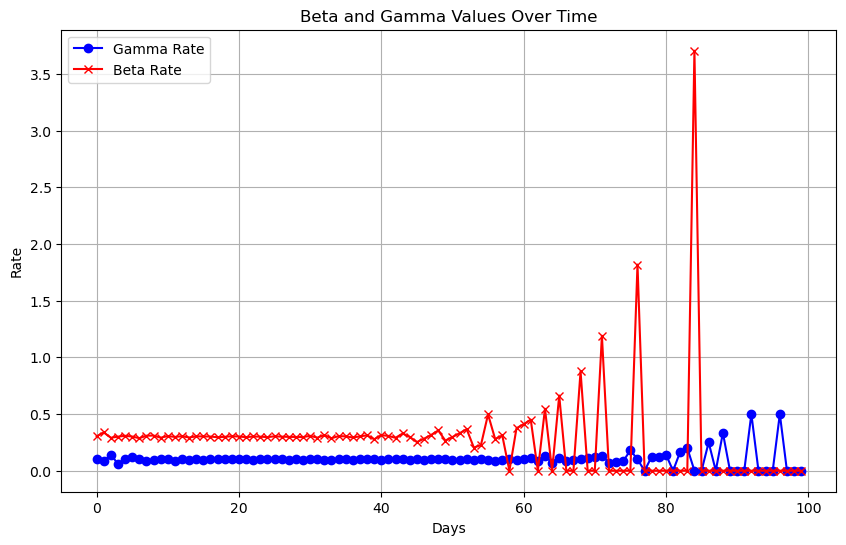

In [15]:
#Plot the gamma and beta rates over time.
plt.figure(figsize=(10, 6))

# Plot beta and gamma values
plt.plot(data_spread['Gamma Rate'], color='blue', label='Gamma Rate', marker='o')
plt.plot(data_spread['Beta Rate'], color='red', label='Beta Rate', marker='x')

# Add labels and title
plt.title('Beta and Gamma Values Over Time')
plt.xlabel('Days')
plt.ylabel('Rate')
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()

You can see how the gamma and beta rate will follow a very similar value until it changes by a large amount towards the end of the data. Track where the values begin to go to extreme values and remove them to find the correct beta and gamma rates for the data.

In [16]:
#Find the gamma rate for the data
gamma_rate = data_spread['Gamma Rate'].iloc[0:80].mean()
gamma_rate

0.10006478314016616

In [17]:
#Find the beta rate for the data
beta_rate = data_spread['Beta Rate'].iloc[0:55].mean()
beta_rate

0.29930967321317714

Gamma rate is 0.1 

Beta rate is 0.3


### Modeling the Spread of the Disease

In [18]:
# Define the SIR model differential equations
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [19]:
# Define the initial conditions
N = 1000  # Total population
I0 = data_spread['Infected'][0]    # Initial number of infected individuals
R0 = data_spread['Recovered'][0]   # Initial number of recovered individuals
S0 = 1000 - I0 - R0  # Initial number of susceptible individuals
y0 = S0, I0, R0   # Initial condition vector

In [20]:
# Define the parameters
beta = 0.3  # Transmission rate
gamma = 0.1 # Recovery rate

# Define the time points to solve the differential equations
t_original = np.linspace(0, 100, len(data_spread))

# Solve the SIR model differential equations
ret = odeint(deriv, y0, t_original, args=(N, beta, gamma))
S_original, I_original, R_original = ret.T

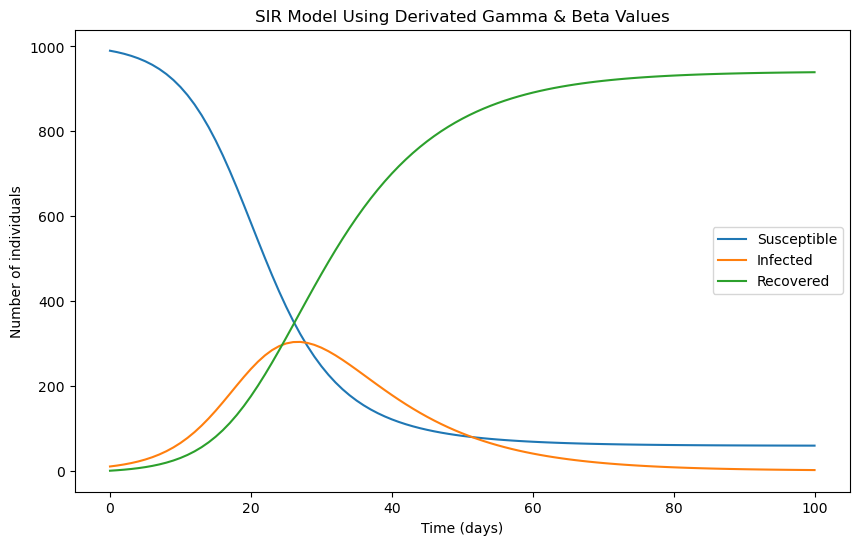

In [21]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(t_original, S_original, label='Susceptible')
plt.plot(t_original, I_original, label='Infected')
plt.plot(t_original, R_original, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SIR Model Using Derivated Gamma & Beta Values')
plt.legend()
plt.show()

### Evaluation of Model
As we used the susceptible differential equation and the recovery different equation, use the infection differential equation using the solved for parameters to compare the actual change in infection numbers with the predicted change in infection numbers.

In [22]:
#Create a prediction of new infection numbers during this time period based off of the solved for gamma and beta rate

for index, day in enumerate(data_spread.index):
    if index + 1 < len(data_spread):
        data_spread['Predicted Infection Number'] = ((0.3*(data_spread['Susceptible']*data_spread['Infected']))/1000) - (0.1 * data_spread['Infected'])
        data_spread.at[index,'Predicted Infection Number']
    else:
        print("End of data reached, cannot pass day", day)
        break  # Stop iterating if day+1 is out of range

data_spread['Residual'] = data_spread['New Infections'] - data_spread['Predicted Infection Number']

data_spread

End of data reached, cannot pass day 100


,Susceptible,Infected,Recovered,Change in Susceptibles,New Infections,New Recoveries,Gamma Rate,Beta Rate,Predicted Infection Number,Residual
Day,,,,,,,,,,
0,990,10,0,NaN,NaN,NaN,0.100000,0.303030,1.9700,NaN
1,987,12,1,-3.0,2.0,1.0,0.083333,0.337724,2.3532,-0.3532
2,983,14,2,-4.0,2.0,1.0,0.142857,0.290655,2.7286,-0.7286
3,979,17,4,-4.0,3.0,2.0,0.058824,0.300427,3.2929,-0.2929
4,974,20,5,-5.0,3.0,1.0,0.100000,0.308008,3.8440,-0.8440
...,...,...,...,...,...,...,...,...,...,...
96,53,2,945,0.0,0.0,0.0,0.500000,0.000000,-0.1682,0.1682
97,53,2,946,0.0,0.0,1.0,0.000000,0.000000,-0.1682,0.1682
98,53,1,946,0.0,-1.0,0.0,0.000000,0.000000,-0.0841,-0.9159


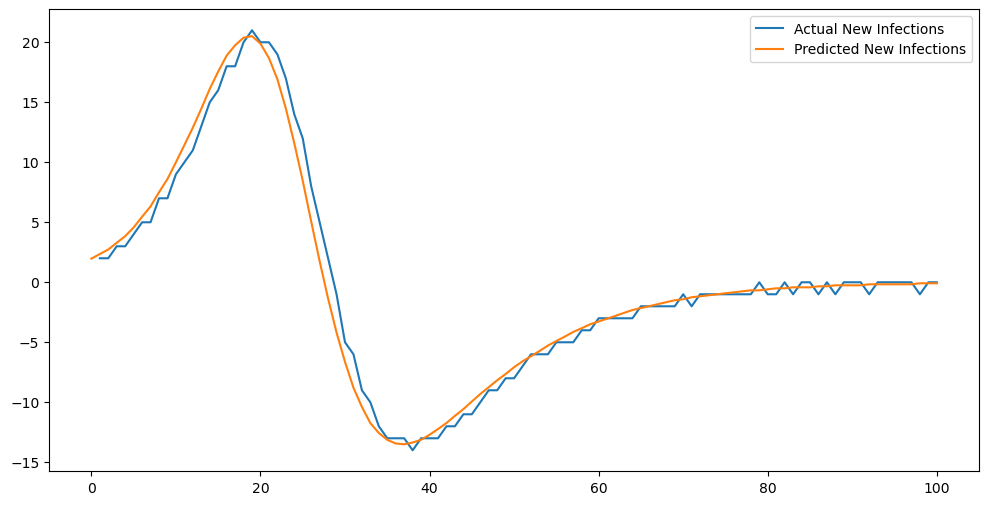

In [23]:
#Plot the residual difference of the predicted infection number vs actual number
plt.figure(figsize=(12,6))
plt.plot(data_spread['New Infections'],label='Actual New Infections')
plt.plot(data_spread['Predicted Infection Number'], label='Predicted New Infections')
plt.legend(loc='best')

In [24]:
#Create prediction of new recoveries
#Create a prediction of new infection numbers during this time period based off of the solved for gamma and beta rate

for index, day in enumerate(data_spread.index):
    if index + 1 < len(data_spread):
        data_spread['Predicted New Recoveries'] = gamma_rate * data_spread['Infected']
        data_spread.at[index,'Predicted New Recoveries']
    else:
        print("End of data reached, cannot pass day", day)
        break  # Stop iterating if day+1 is out of range

data_spread

End of data reached, cannot pass day 100


,Susceptible,Infected,Recovered,Change in Susceptibles,New Infections,New Recoveries,Gamma Rate,Beta Rate,Predicted Infection Number,Residual,Predicted New Recoveries
Day,,,,,,,,,,,
0,990,10,0,NaN,NaN,NaN,0.100000,0.303030,1.9700,NaN,1.000648
1,987,12,1,-3.0,2.0,1.0,0.083333,0.337724,2.3532,-0.3532,1.200777
2,983,14,2,-4.0,2.0,1.0,0.142857,0.290655,2.7286,-0.7286,1.400907
3,979,17,4,-4.0,3.0,2.0,0.058824,0.300427,3.2929,-0.2929,1.701101
4,974,20,5,-5.0,3.0,1.0,0.100000,0.308008,3.8440,-0.8440,2.001296
...,...,...,...,...,...,...,...,...,...,...,...
96,53,2,945,0.0,0.0,0.0,0.500000,0.000000,-0.1682,0.1682,0.200130
97,53,2,946,0.0,0.0,1.0,0.000000,0.000000,-0.1682,0.1682,0.200130
98,53,1,946,0.0,-1.0,0.0,0.000000,0.000000,-0.0841,-0.9159,0.100065


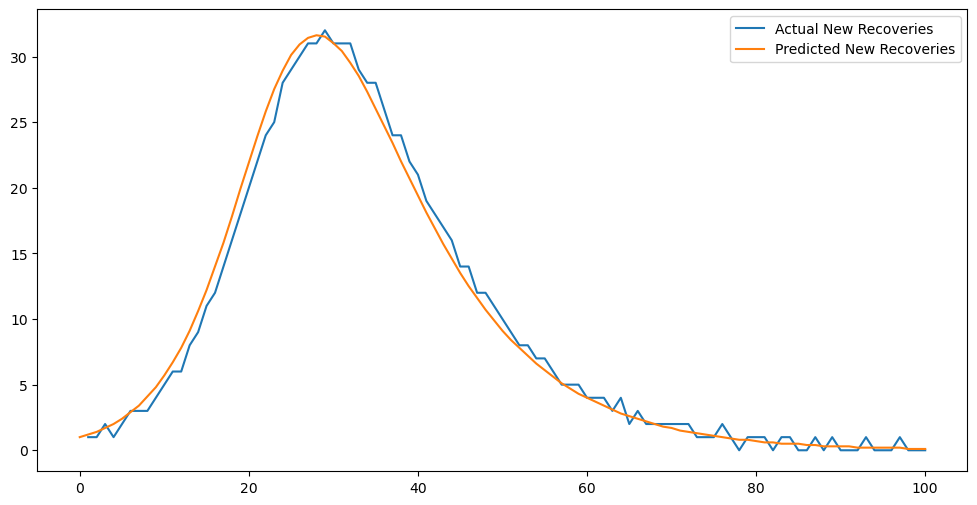

In [25]:
#Plot the residual difference of the predicted recovery rate vs actual recovery rate
plt.figure(figsize=(12,6))
plt.plot(data_spread['New Recoveries'],label='Actual New Recoveries')
plt.plot(data_spread['Predicted New Recoveries'], label='Predicted New Recoveries')
plt.legend(loc='best')

In [26]:
# Drop NA values
data_spread_no_na = data_spread.dropna()

predicted_total_infections = 0  # Initialize the variable to accumulate the predicted total infections
predicted_total_recoveries = 0

# Initialize a new column for 'Number of people with infection'
data_spread_no_na['Number of people with infection'] = None

# Iterate over each row in the DataFrame
for index, row in data_spread_no_na.iterrows():
    predicted_infected_value = abs(row['Predicted Infection Number'])
    predicted_recovery_value = row['Predicted New Recoveries']
    
    # Accumulate the total infections and recoveries
    predicted_total_infections += predicted_infected_value
    predicted_total_recoveries = predicted_recovery_value
    
    # Calculate the number of people with infection for each row
    data_spread_no_na.at[index, 'Number of people with infection'] = predicted_infected_value - predicted_recovery_value

# Display the DataFrame with the new column updated
data_spread_no_na

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_45838/2418524706.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spread_no_na['Number of people with infection'] = None


,Susceptible,Infected,Recovered,Change in Susceptibles,New Infections,New Recoveries,Gamma Rate,Beta Rate,Predicted Infection Number,Residual,Predicted New Recoveries,Number of people with infection
Day,,,,,,,,,,,,
1,987,12,1,-3.0,2.0,1.0,0.083333,0.337724,2.3532,-0.3532,1.200777,1.152423
2,983,14,2,-4.0,2.0,1.0,0.142857,0.290655,2.7286,-0.7286,1.400907,1.327693
3,979,17,4,-4.0,3.0,2.0,0.058824,0.300427,3.2929,-0.2929,1.701101,1.591799
4,974,20,5,-5.0,3.0,1.0,0.100000,0.308008,3.8440,-0.8440,2.001296,1.842704
5,968,24,7,-6.0,4.0,2.0,0.125000,0.301309,4.5696,-0.5696,2.401555,2.168045
...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,2,945,0.0,0.0,0.0,0.000000,0.000000,-0.1682,0.1682,0.200130,-0.03193
96,53,2,945,0.0,0.0,0.0,0.500000,0.000000,-0.1682,0.1682,0.200130,-0.03193
97,53,2,946,0.0,0.0,1.0,0.000000,0.000000,-0.1682,0.1682,0.200130,-0.03193


#### MAE for infection rate and recovery rate

In [27]:
from sklearn.metrics import mean_absolute_error

mae_infection_rate = mean_absolute_error(data_spread_no_na['New Infections'],data_spread_no_na['Predicted Infection Number'])
mae_recovery_rate = mean_absolute_error(data_spread_no_na['New Recoveries'],data_spread_no_na['Predicted New Recoveries'])

print(f'MAE for infection rate: {mae_infection_rate}')
print(f'MAE for recovery rate: {mae_recovery_rate}')

MAE for infection rate: 0.7820636363636366
MAE for recovery rate: 0.75322517971274


These mean absolute errors are very low. This suggests that the beta and gamma rate that was derived is very accurate to model the actual data that took place. This includes decimal places in the infection numbers o rounding would need to take place for individual day projections of infections or recoveries in the future.

## 2. Stoachistic Modeling

### Create random beta and gamma values

In [28]:
import numpy as np

# Define parameters for the normal distribution for beta
beta_mean = 0.3
beta_std_dev = 0.1  # Adjusted to create values closer to the mean
beta_size = 9

# Generate random values for beta from the normal distribution
random_beta_values = np.random.normal(beta_mean, beta_std_dev, beta_size)
random_beta_values = [round(val, 2) for val in random_beta_values]

print("9 Random beta values from normal distribution:", random_beta_values)

# Define parameters for the normal distribution for gamma
gamma_mean = 0.1
gamma_std_dev = 0.05  # Adjusted to create values closer to the mean
gamma_size = 9

# Generate random values for gamma from the normal distribution
random_gamma_values = np.random.normal(gamma_mean, gamma_std_dev, gamma_size)
random_gamma_values = [round(val, 3) for val in random_gamma_values]

print("9 Random gamma values from normal distribution:", random_gamma_values)

9 Random beta values from normal distribution: [0.26, 0.26, 0.09, 0.32, 0.18, 0.39, 0.3, 0.31, 0.26]
9 Random gamma values from normal distribution: [0.098, 0.129, 0.067, 0.137, 0.088, 0.116, 0.083, 0.163, 0.122]


### Function for Stochastic Modeling
This function is going to return the 9 subplots of differing beta and gamma values to simulate how they change. 

In [29]:
# Define the SIR model equations
def sir_model(S0, I0, R0, beta, gamma, total_days):
    S = [S0]
    I = [I0]
    R = [R0]
    N = S0 + I0 + R0
    
    for day in range(1, total_days):
        dS = -beta * S[-1] * I[-1] / N
        dI = beta * S[-1] * I[-1] / N - gamma * I[-1]
        dR = gamma * I[-1]
        
        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)
    
    return S, I, R

# Simulate the SIR model with random beta and gamma values
def simulate_sir_model_with_random_params_grid_plot(beta_values, gamma_values, total_days):
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    fig.suptitle('SIR Model with Random Parameters')
    
    for i in range(len(beta_values)):
        beta = beta_values[i]
        gamma = gamma_values[i]
        
        # Simulate the SIR model
        S, I, R = sir_model(S0, I0, R0, beta, gamma, total_days)
        
        # Plot the results
        ax = axs[i // 3, i % 3]
        ax.plot(range(total_days), S, label='Susceptible')
        ax.plot(range(total_days), I, label='Infectious')
        ax.plot(range(total_days), R, label='Recovered')
        ax.set_title(f'Beta: {beta}, Gamma: {gamma}')
        ax.set_xlabel('Days')
        ax.set_ylabel('Population')
        ax.legend()
        
    plt.tight_layout()
    plt.show()

### Function for Stoachastic Modeling with parameters combined
This function is going to group the susceptible, infection and recovery graphs into individual subplots with a legend displaying the different beta and gamma rate. This is going to help visualise how these changing rate will influence how infection,recovery and susceptibles change with changes in parameters.

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_sir_model_with_random_params_combined(beta_values, gamma_values, total_days):
    num_plots = len(beta_values)
    fig, axs = plt.subplots(1, 3, figsize=(24, 8))
    
    # Calculate the absolute difference between beta and gamma
    beta_gamma_diff = np.abs(np.array(beta_values) - np.array(gamma_values))
    max_diff = max(beta_gamma_diff)
    min_diff = min(beta_gamma_diff)
    
    # Define colormaps based on the difference
    cmap_infectious = plt.cm.Reds((beta_gamma_diff - min_diff) / (max_diff - min_diff))
    cmap_recovered = plt.cm.Greens((beta_gamma_diff - min_diff) / (max_diff - min_diff))
    cmap_susceptible = plt.cm.Blues((beta_gamma_diff - min_diff) / (max_diff - min_diff))
    
    for i in range(num_plots):
        beta = beta_values[i]
        gamma = gamma_values[i]
        
        # Simulate the SIR model
        S, I, R = sir_model(S0, I0, R0, beta, gamma, total_days)
        
        # Plot the results for Infectious
        axs[0].plot(range(total_days), I, label=f'Beta: {beta}, Gamma: {gamma}', color=cmap_infectious[i])
        axs[0].set_title('Infectious')
        axs[0].set_xlabel('Days')
        axs[0].set_ylabel('Population')
        axs[0].legend()
        
        # Plot the results for Recovered
        axs[1].plot(range(total_days), R, label=f'Beta: {beta}, Gamma: {gamma}', color=cmap_recovered[i])
        axs[1].set_title('Recovered')
        axs[1].set_xlabel('Days')
        axs[1].set_ylabel('Population')
        axs[1].legend()
        
        # Plot the results for Susceptible
        axs[2].plot(range(total_days), S, label=f'Beta: {beta}, Gamma: {gamma}', color=cmap_susceptible[i])
        axs[2].set_title('Susceptible')
        axs[2].set_xlabel('Days')
        axs[2].set_ylabel('Population')
        axs[2].legend()
        
    plt.tight_layout()
    plt.show()

### Visualisation of Stochastic Modeling for SHUFlu

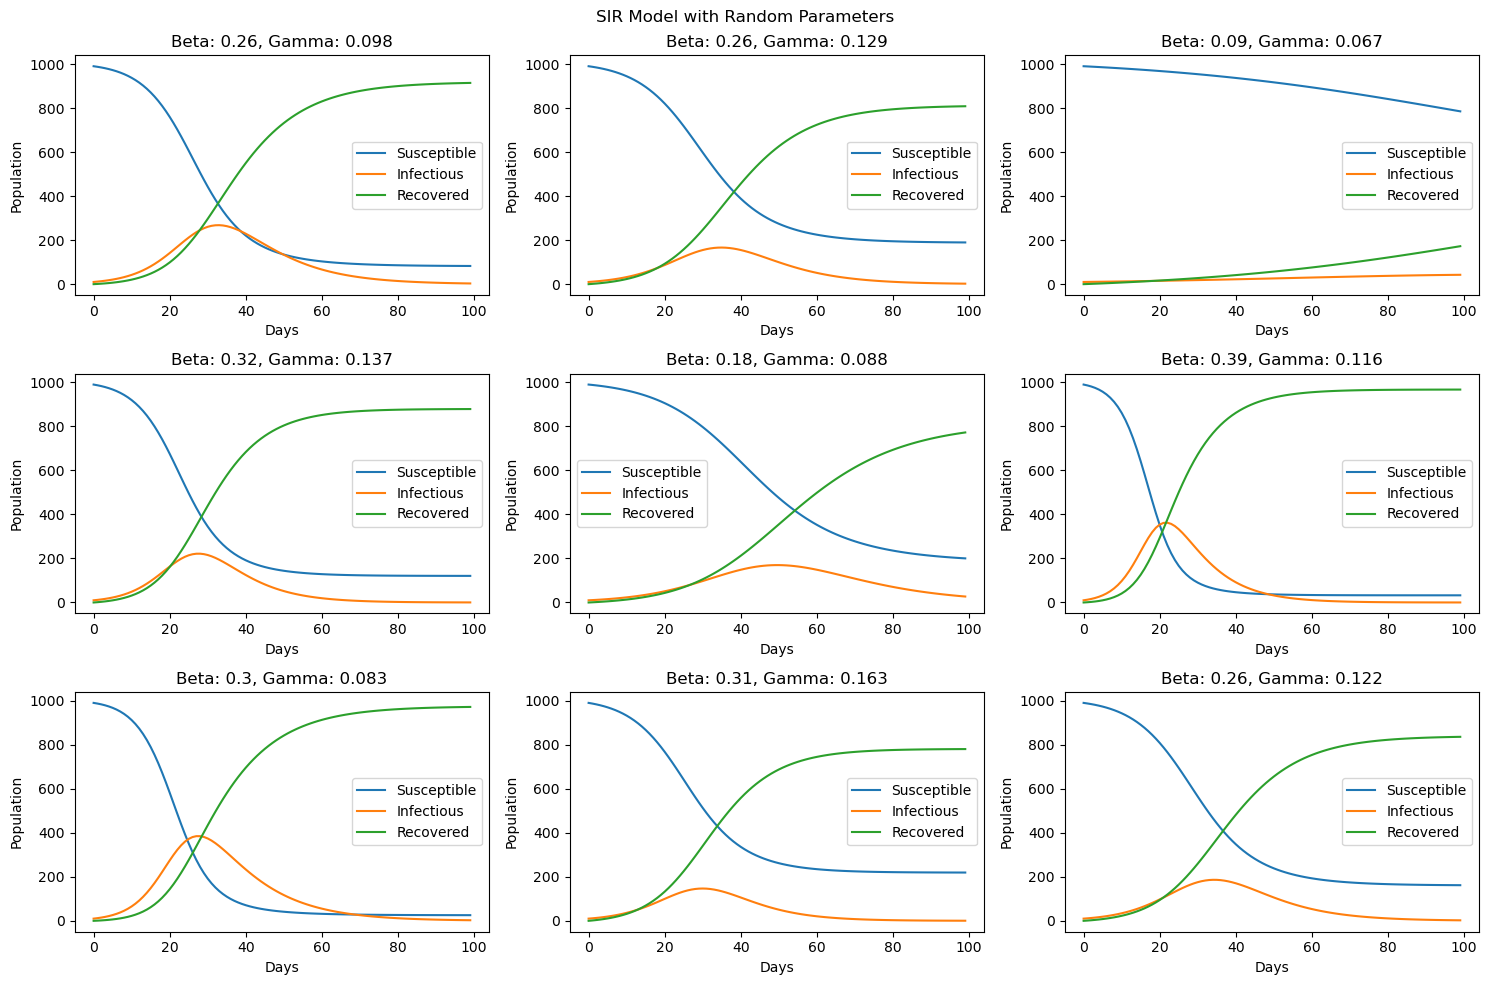

In [31]:
# Define initial values for S, I, R
S0 = 990
I0 = 10
R0 = 0

# Total days for simulation
total_days = 100

# Simulate the SIR model with random beta and gamma values
simulate_sir_model_with_random_params_grid_plot(random_beta_values, random_gamma_values, total_days)


In [32]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_sir_model_with_random_params_combined(beta_values, gamma_values, total_days):
    num_plots = len(beta_values)
    fig, axs = plt.subplots(1, 3, figsize=(24, 8))
    
    # Calculate the normalized difference between beta and gamma for color intensity adjustment
    max_diff = max(abs(np.array(beta_values) - np.array(gamma_values)))
    normalized_diff = [abs(beta - gamma) / max_diff for beta, gamma in zip(beta_values, gamma_values)]
    
    for i in range(num_plots):
        beta = beta_values[i]
        gamma = gamma_values[i]
        
        # Simulate the SIR model
        S, I, R = sir_model(S0, I0, R0, beta, gamma, total_days)
        
        # Adjust color intensity based on the normalized difference
        color_intensity = normalized_diff[i]
        
        # Plot the results for Infectious
        axs[0].plot(range(total_days), I, label=f'Beta: {beta}, Gamma: {gamma}', color=plt.cm.Reds(color_intensity))
        axs[0].set_title('Infectious')
        axs[0].set_xlabel('Days')
        axs[0].set_ylabel('Population')
        axs[0].legend()
        
        # Plot the results for Recovered
        axs[1].plot(range(total_days), R, label=f'Beta: {beta}, Gamma: {gamma}', color=plt.cm.Greens(color_intensity))
        axs[1].set_title('Recovered')
        axs[1].set_xlabel('Days')
        axs[1].set_ylabel('Population')
        axs[1].legend()
        
        # Plot the results for Susceptible
        axs[2].plot(range(total_days), S, label=f'Beta: {beta}, Gamma: {gamma}', color=plt.cm.Blues(color_intensity))
        axs[2].set_title('Susceptible')
        axs[2].set_xlabel('Days')
        axs[2].set_ylabel('Population')
        axs[2].legend()
        
    plt.tight_layout()
    plt.show()


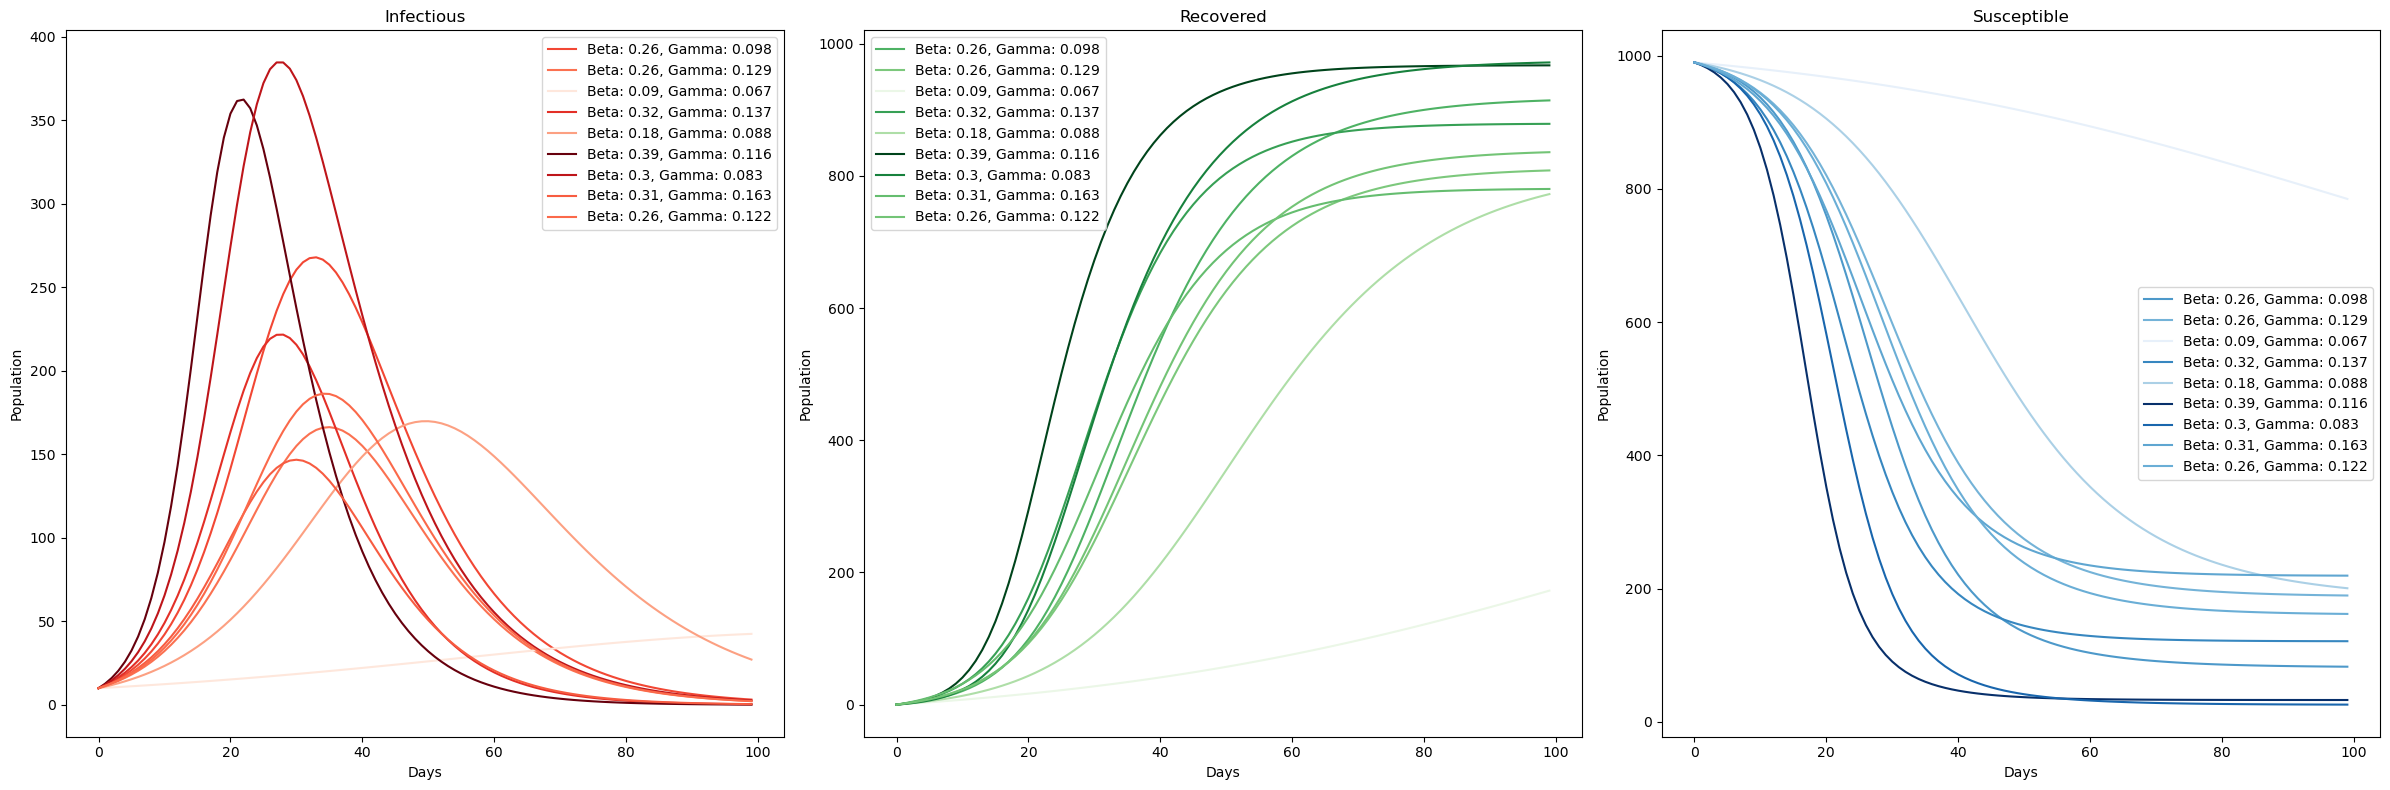

In [33]:
# Define initial values for S, I, R
S0 = 990
I0 = 10
R0 = 0

# Total days for simulation
total_days = 100

# Simulate the SIR model with random beta and gamma values
simulate_sir_model_with_random_params_combined(random_beta_values, random_gamma_values, total_days)


## 3. Neural Network

In [34]:
#Create the data that can be used for the neural network
neural_network = data_spread.drop(columns=['Predicted Infection Number','Residual'])
neural_network.to_csv('/Users/ben_nicholson/Visual_Code_Projects/Mathmatical Modeling/Final Project/Data Files/neural_network_data.csv')

In [35]:
#Return the predictor data from the neural network in orange
neural_network_predictors = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Mathmatical Modeling/Final Project/Data Files/predictors_neural_networks.csv')
neural_network_predictors =neural_network_predictors[2:].drop(columns='Predicted New Recoveries')
neural_network_predictors.rename(columns={'Unnamed: 1': 'Neural Network Prediction', neural_network_predictors.columns[2]:'Neural Network Error'}, inplace=True)
neural_network_predictors

,Infected,Neural Network Prediction,Neural Network Error,Day,Susceptible,Recovered
2,5,5.26488,0.264883,84,54,942
3,61,59.1999,-1.8001,55,66,874
4,24,23.7115,-0.288527,66,57,919
5,22,21.8534,-0.146578,67,57,921
6,135,136.461,1.46134,45,88,776
...,...,...,...,...,...,...
88,78,77.1453,-0.854684,52,70,852
89,239,240.686,1.68553,21,594,167
90,14,17.2769,3.27688,2,983,2
91,275,275.304,0.304325,23,509,216


In [36]:
for column in neural_network_predictors.columns:
    # Check if the column contains non-integer values
    non_integer_values = neural_network_predictors[~neural_network_predictors[column].astype(str).str.replace('_', '').str.isdigit()][column]
    
    # If non-integer values are found, display them and remove them from the DataFrame
    if not non_integer_values.empty:
        print(f"Non-integer values in column '{column}':")
        print(non_integer_values)
        neural_network_predictors = neural_network_predictors[neural_network_predictors[column].astype(str).str.replace('_', '').str.isdigit()]
    
    # Convert the column to integers
    neural_network_predictors[column] = neural_network_predictors[column].astype(int)

Non-integer values in column 'Neural Network Prediction':
2     5.26488
3     59.1999
4     23.7115
5     21.8534
6     136.461
       ...   
88    77.1453
89    240.686
90    17.2769
91    275.304
92    4.05313
Name: Neural Network Prediction, Length: 91, dtype: object


In [37]:
#Print the data types
neural_network_predictors.dtypes

Infected                     int64
Neural Network Prediction    int64
Neural Network Error         int64
Day                          int64
Susceptible                  int64
Recovered                    int64
dtype: object

In [38]:
#Return the test data from the neural network in orange
neural_network_evaluation = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Mathmatical Modeling/Final Project/Data Files/evaluation_neural_network.csv')
neural_network_evaluation[2:]

,Infected,Neural Network,Fold,Day,Susceptible,Recovered
2,1,2.44965,1,99,53,946
3,12,11.575,1,74,55,933
4,4,4.67785,1,86,53,942
5,6,6.06552,1,82,54,940
6,219,213.076,1,20,636,145
7,40,39.0752,1,60,61,899
8,15,14.5823,1,71,56,929
9,106,96.1819,1,14,840,54
10,2,3.16961,1,92,53,944
11,84,84.9305,1,51,72,844


In [39]:
for column in neural_network_evaluation.columns:
    # Check if the column contains non-integer values
    non_integer_values = neural_network_evaluation[~neural_network_evaluation[column].astype(str).str.isdigit()][column]
    
    # If non-integer values are found, display them and remove them from the DataFrame
    if not non_integer_values.empty:
        print(f"Non-integer values in column '{column}':")
        print(non_integer_values)
        neural_network_evaluation = neural_network_evaluation[neural_network_evaluation[column].astype(str).str.isdigit()]
    
    # Convert the column to integers
    neural_network_evaluation[column] = neural_network_evaluation[column].astype(int)

Non-integer values in column 'Infected':
0    continuous
1         class
Name: Infected, dtype: object
Non-integer values in column 'Neural Network':
2     2.44965
3      11.575
4     4.67785
5     6.06552
6     213.076
7     39.0752
8     14.5823
9     96.1819
10    3.16961
11    84.9305
Name: Neural Network, dtype: object


## 4. Graph Theoretical Analysis

In [41]:
"""
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
# Read data from file and construct the edges list
edges = []
with open('/Users/ben_nicholson/Visual_Code_Projects/Mathmatical Modeling/Final Project/Data Files/Population_Contact_Network.csv', 'r') as file:
    next(file)  # skip header
    for line in file:
        line_data = line.strip().split(',')
        person1, person2 = line_data
        edges.append((person1, person2, 1))  # assuming weight 1 for each contact

# Create the graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Solve the Traveling Salesman Problem (TSP) - Using an approximation method here
tsp_solution = nx.approximation.traveling_salesman_problem(G, weight='weight')

# Convert list of nodes in tsp_solution to list of edges for plotting
tsp_edges = [(tsp_solution[i], tsp_solution[i + 1]) for i in range(len(tsp_solution) - 1)]
tsp_edges.append((tsp_solution[-1], tsp_solution[0]))  # to complete the cycle

# Plotting the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=tsp_edges, width=8, alpha=0.5, edge_color='r')

plt.show()

# Output the optimal path and its cost
print("Optimal path:", tsp_solution)
print("Total distance:", sum(G[u][v]['weight'] for u, v in tsp_edges))
"""

'\nimport networkx as nx\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(30,30))\n# Read data from file and construct the edges list\nedges = []\nwith open(\'/Users/ben_nicholson/Visual_Code_Projects/Mathmatical Modeling/Final Project/Data Files/Population_Contact_Network.csv\', \'r\') as file:\n    next(file)  # skip header\n    for line in file:\n        line_data = line.strip().split(\',\')\n        person1, person2 = line_data\n        edges.append((person1, person2, 1))  # assuming weight 1 for each contact\n\n# Create the graph\nG = nx.Graph()\nG.add_weighted_edges_from(edges)\n\n# Solve the Traveling Salesman Problem (TSP) - Using an approximation method here\ntsp_solution = nx.approximation.traveling_salesman_problem(G, weight=\'weight\')\n\n# Convert list of nodes in tsp_solution to list of edges for plotting\ntsp_edges = [(tsp_solution[i], tsp_solution[i + 1]) for i in range(len(tsp_solution) - 1)]\ntsp_edges.append((tsp_solution[-1], tsp_solution[0]))  # to complete th

## 5. Simulation & Analysis

### Vaccination Rollout
Make the vaccination rate at 1% of the population per day after 10%, 20%, 30% of the population in total has had the disease this will help highlight the importance of intervening earlier than later. Assume a fixed vaccination rate.

Use the predicted infection number with the calculated gamma and beta rate at that time period so that it would be as if an epidemioligist had actually made.

The current situation, get the first 10% of population wtih virus. Use the predicted number of infections based on the gamma and beta rate at day.

In [42]:
def find_infection_day(data_spread, target_percentages, total_population):
    days_to_percent = {}
    for target_percentage in target_percentages:
        day = 0
        ten_percent_interval = 0
        while ten_percent_interval < 100 and day < len(data_spread['Infected']):
            ten_percent_interval = data_spread['Infected'][day] / total_population * 100
            if ten_percent_interval >= target_percentage:
                return day
            day += 1
    return None  # Target percentage not reached

In [43]:
#Find the number of days til ten percent of population has been infected
days_til_ten_percent = find_infection_day(data_spread, [10], 1000)
days_til_ten_percent

14

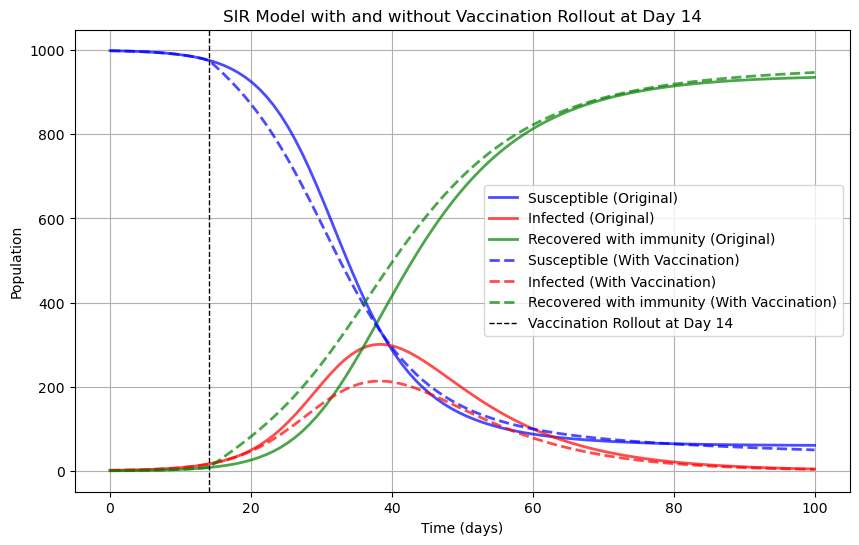

In [44]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function that returns the derivatives of the SIR model equations
def derivs(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Parameters for original SIR model
N = 1000  # Total population
beta = 0.3  # Contact rate
gamma = 0.1  # Recovery rate

# Initial number of infected and recovered individuals, rest are susceptible
I0, R0 = 1, 0
S0 = N - I0 - R0

# Time vector
t = np.linspace(0, 100, 100)

# Original SIR model without vaccination rollout
y0 = S0, I0, R0
ret_original = odeint(derivs, y0, t, args=(N, beta, gamma))
S_original, I_original, R_original = ret_original.T

# Parameters for SIR model with vaccination rollout
vacc_start_day = 14  # Day when vaccination rollout begins
vacc_rate = 0.01  # Vaccination rate
delta = vacc_rate * N / (N - (vacc_rate * N))  # Effective vaccination rate

# Initial conditions vector for SIR model with vaccination rollout
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid with vaccination rollout
ret_vacc = odeint(derivs, y0, t, args=(N, beta, gamma))
S_vacc, I_vacc, R_vacc = ret_vacc.T

# Integrate the SIR equations over the time grid with vaccination rollout
def derivs_vacc(y, t, N, beta, gamma, delta, vacc_start_day, vacc_rate):
    S, I, R = y
    dSdt = -beta * S * I / N - delta * (t >= vacc_start_day) * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + delta * (t >= vacc_start_day) * S
    return dSdt, dIdt, dRdt

ret_vacc = odeint(derivs_vacc, y0, t, args=(N, beta, gamma, delta, vacc_start_day, vacc_rate))
S_vacc, I_vacc, R_vacc = ret_vacc.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S_original, 'b', alpha=0.7, linewidth=2, label='Susceptible (Original)')
plt.plot(t, I_original, 'r', alpha=0.7, linewidth=2, label='Infected (Original)')
plt.plot(t, R_original, 'g', alpha=0.7, linewidth=2, label='Recovered with immunity (Original)')

plt.plot(t, S_vacc, 'b--', alpha=0.7, linewidth=2, label='Susceptible (With Vaccination)')
plt.plot(t, I_vacc, 'r--', alpha=0.7, linewidth=2, label='Infected (With Vaccination)')
plt.plot(t, R_vacc, 'g--', alpha=0.7, linewidth=2, label='Recovered with immunity (With Vaccination)')

plt.axvline(x=vacc_start_day, color='k', linestyle='--', linewidth=1, label='Vaccination Rollout at Day 14')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model with and without Vaccination Rollout at Day 14')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
#Find the number of days til twenty percent of population has been infected
days_til_twenty_percent = find_infection_day(data_spread, [20], 1000)
days_til_twenty_percent

20

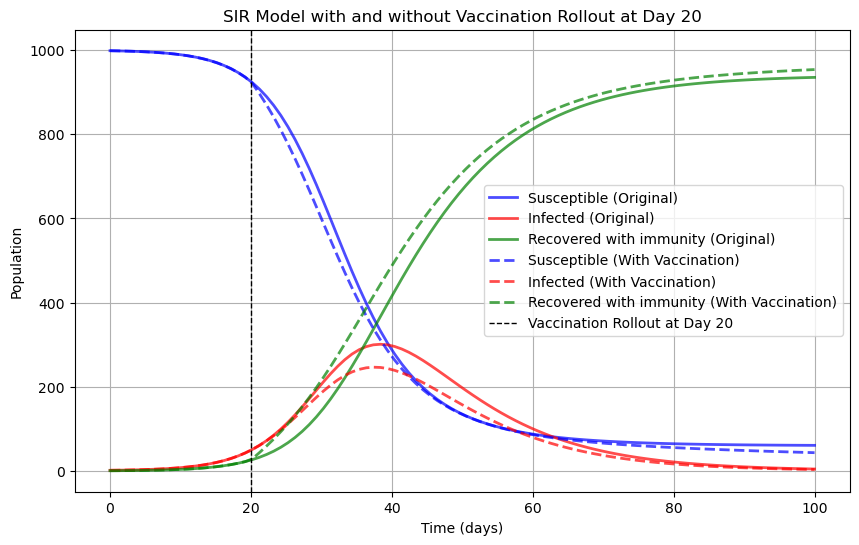

954.1815423961972
935.5719934580486


In [46]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function that returns the derivatives of the SIR model equations
def derivs(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Parameters for original SIR model
N = 1000  # Total population
beta = 0.3  # Contact rate
gamma = 0.1  # Recovery rate

# Initial number of infected and recovered individuals, rest are susceptible
I0, R0 = 1, 0
S0 = N - I0 - R0

# Time vector
t = np.linspace(0,100, 100)

# Original SIR model without vaccination rollout
y0 = S0, I0, R0
ret_original = odeint(derivs, y0, t, args=(N, beta, gamma))
S_original, I_original, R_original = ret_original.T

# Parameters for SIR model with vaccination rollout
vacc_start_day = 20  # Day when vaccination rollout begins
vacc_rate = 0.01  # Vaccination rate
delta = vacc_rate * N / (N - (vacc_rate * N))  # Effective vaccination rate

# Initial conditions vector for SIR model with vaccination rollout
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid with vaccination rollout
ret_vacc = odeint(derivs, y0, t, args=(N, beta, gamma))
S_vacc, I_vacc, R_vacc = ret_vacc.T

# Integrate the SIR equations over the time grid with vaccination rollout
def derivs_vacc(y, t, N, beta, gamma, delta, vacc_start_day, vacc_rate):
    S, I, R = y
    dSdt = -beta * S * I / N - delta * (t >= vacc_start_day) * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + delta * (t >= vacc_start_day) * S
    return dSdt, dIdt, dRdt

ret_vacc = odeint(derivs_vacc, y0, t, args=(N, beta, gamma, delta, vacc_start_day, vacc_rate))
S_vacc, I_vacc, R_vacc = ret_vacc.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S_original, 'b', alpha=0.7, linewidth=2, label='Susceptible (Original)')
plt.plot(t, I_original, 'r', alpha=0.7, linewidth=2, label='Infected (Original)')
plt.plot(t, R_original, 'g', alpha=0.7, linewidth=2, label='Recovered with immunity (Original)')

plt.plot(t, S_vacc, 'b--', alpha=0.7, linewidth=2, label='Susceptible (With Vaccination)')
plt.plot(t, I_vacc, 'r--', alpha=0.7, linewidth=2, label='Infected (With Vaccination)')
plt.plot(t, R_vacc, 'g--', alpha=0.7, linewidth=2, label='Recovered with immunity (With Vaccination)')

plt.axvline(x=vacc_start_day, color='k', linestyle='--', linewidth=1, label='Vaccination Rollout at Day 20')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model with and without Vaccination Rollout at Day 20')
plt.legend()
plt.grid(True)
plt.show()

print(R_vacc[-1])
print(R_original[-1])


In [47]:
#Find the number of days til thirty percent of population has been infected
days_til_thirty_percent = find_infection_day(data_spread, [30], 1000)
days_til_thirty_percent

25

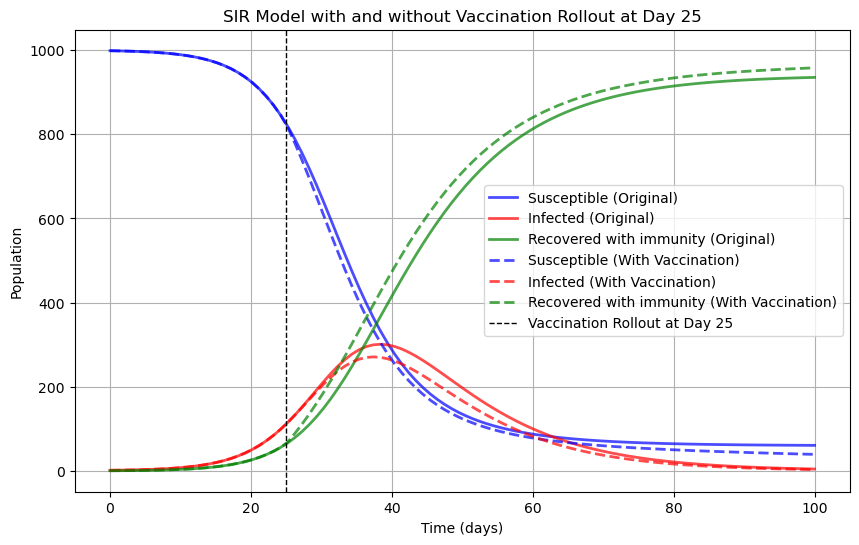

958.3134970541075
935.5719934580486


In [48]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function that returns the derivatives of the SIR model equations
def derivs(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Parameters for original SIR model
N = 1000  # Total population
beta = 0.3  # Contact rate
gamma = 0.1  # Recovery rate

# Initial number of infected and recovered individuals, rest are susceptible
I0, R0 = 1, 0
S0 = N - I0 - R0

# Time vector
t = np.linspace(0, 100,100)

# Original SIR model without vaccination rollout
y0 = S0, I0, R0
ret_original = odeint(derivs, y0, t, args=(N, beta, gamma))
S_original, I_original, R_original = ret_original.T

# Parameters for SIR model with vaccination rollout
vacc_start_day = 25  # Day when vaccination rollout begins
vacc_rate = 0.01  # Vaccination rate
delta = vacc_rate * N / (N - (vacc_rate * N))  # Effective vaccination rate

# Initial conditions vector for SIR model with vaccination rollout
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid with vaccination rollout
ret_vacc = odeint(derivs, y0, t, args=(N, beta, gamma))
S_vacc, I_vacc, R_vacc = ret_vacc.T

# Integrate the SIR equations over the time grid with vaccination rollout
def derivs_vacc(y, t, N, beta, gamma, delta, vacc_start_day, vacc_rate):
    S, I, R = y
    dSdt = -beta * S * I / N - delta * (t >= vacc_start_day) * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + delta * (t >= vacc_start_day) * S
    return dSdt, dIdt, dRdt

ret_vacc = odeint(derivs_vacc, y0, t, args=(N, beta, gamma, delta, vacc_start_day, vacc_rate))
S_vacc, I_vacc, R_vacc = ret_vacc.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S_original, 'b', alpha=0.7, linewidth=2, label='Susceptible (Original)')
plt.plot(t, I_original, 'r', alpha=0.7, linewidth=2, label='Infected (Original)')
plt.plot(t, R_original, 'g', alpha=0.7, linewidth=2, label='Recovered with immunity (Original)')

plt.plot(t, S_vacc, 'b--', alpha=0.7, linewidth=2, label='Susceptible (With Vaccination)')
plt.plot(t, I_vacc, 'r--', alpha=0.7, linewidth=2, label='Infected (With Vaccination)')
plt.plot(t, R_vacc, 'g--', alpha=0.7, linewidth=2, label='Recovered with immunity (With Vaccination)')

plt.axvline(x=vacc_start_day, color='k', linestyle='--', linewidth=1, label='Vaccination Rollout at Day 25')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model with and without Vaccination Rollout at Day 25')
plt.legend()
plt.grid(True)
plt.show()

print(R_vacc[-1])
print(R_original[-1])

### Lockdowns
Make the lockdowns where the beta rate goes to 0 at 10%, 20% and 30% of the population with the disease.

### Social Distancing
Reduce the beta rate for all individuals at 10%,20%,30% of the population with the disease.

In [49]:
gamma_rate

0.10006478314016616